In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
#Reading the bikes dataset
bikes_data=pd.read_csv('day.csv')
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Understanding data

In [4]:
bikes_data.shape

(730, 16)

In [5]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### there are no missing values in the dataset,so no need to impute or drop any values.

In [7]:
bikes_data.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [40]:
bikes_data.nunique()# we can see that season,yr,mnth,holiday,weekday,working,weathersit are categorical variables
                     # represented using numeric values

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### As there is not much difference in the mean and median,we can assume that there are no outliers.

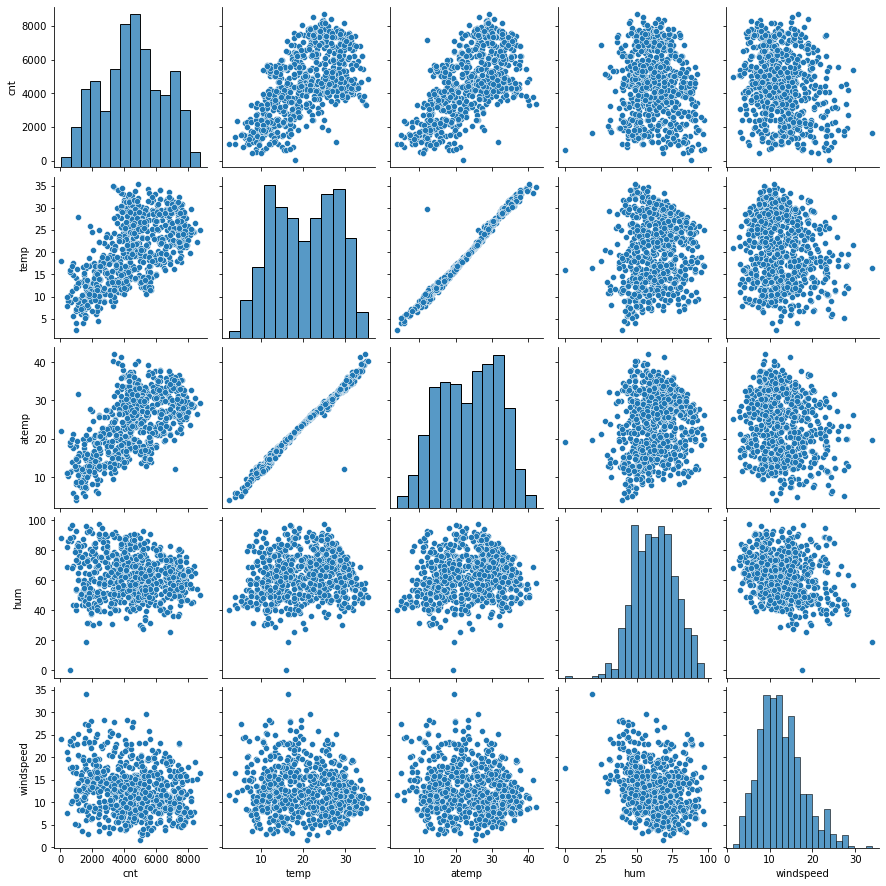

In [12]:
#Visualising pairplots of all numeric variables
sns.pairplot(data=bikes_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])

#### From the above pairplots we can observe that,
1)variables like atemp,temp are correlated<br>
2)temp and cnt are correlated

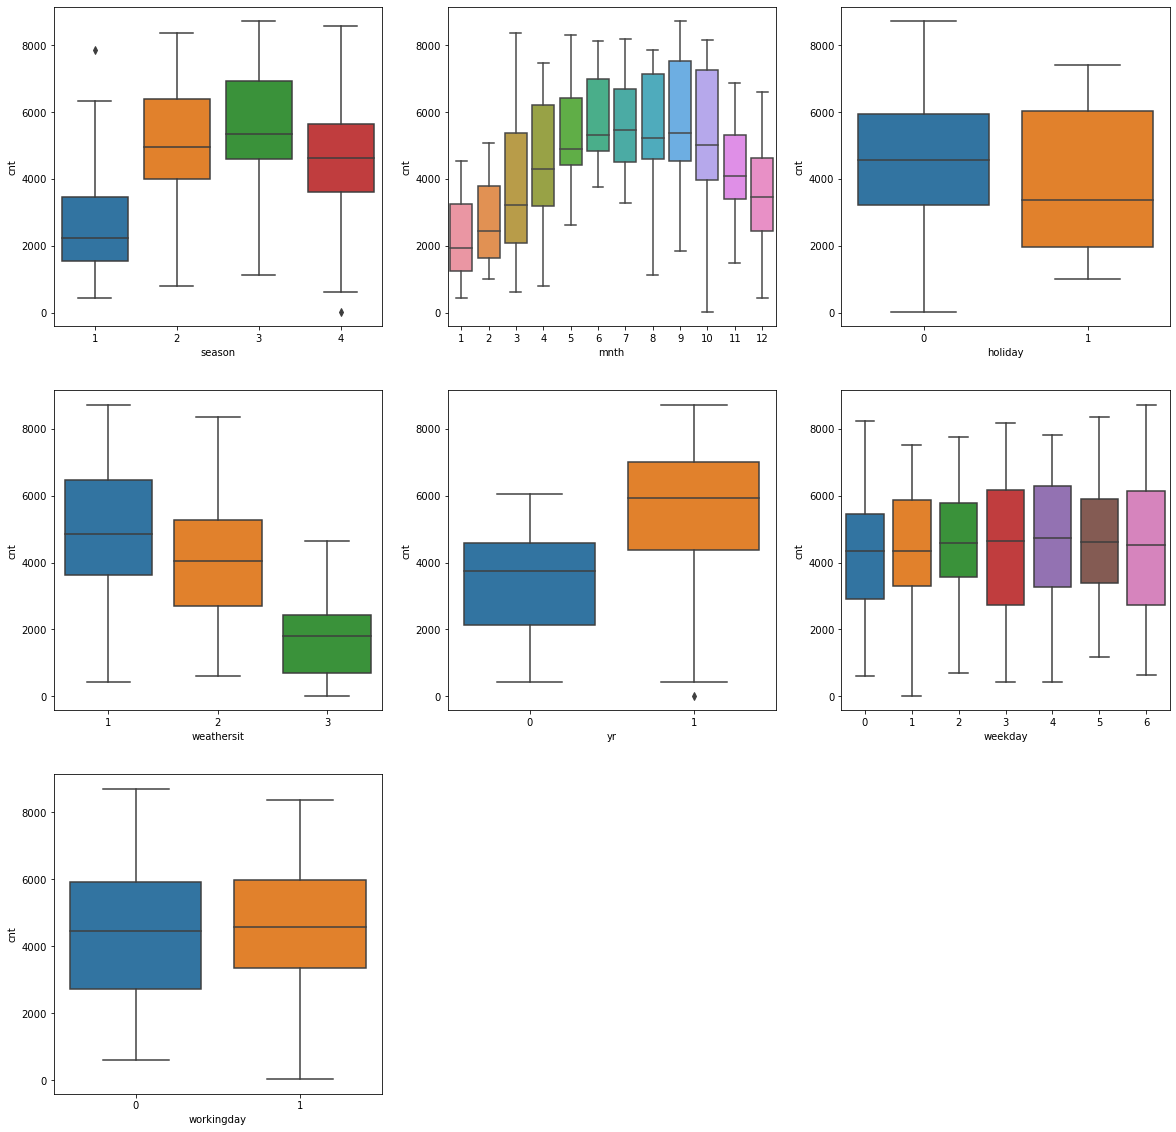

In [31]:
#Visualising boxplots for categorical variables
vars=['season','mnth','holiday','weathersit','yr','weekday','workingday']
plt.figure(figsize=(20, 20))
j=1
for i in vars:
    plt.subplot(3,3,j)
    j+=1
    sns.boxplot(x =i, y = 'cnt', data = bikes_data)

#### From the above plots we can observe that ,
1) cnt is more in season-1(Spring)<br>
2) cnt is higher in 2019<br>
3) cnt is zero for weather situation -4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)<br>
4) The cnt values increases in season-2(summer) and highest in fall, then again decreases in season-4(winter) <br>
5) The cnt is lesser during holidays<br>
6) cnt is higher during november month,but less during january

#### Data Cleaning

In [41]:
#Dropping unnecessary columns in the dataset
# cnt =casual+registered, so we can drop these two
# instant and dteday not required for the current analysis
bikes_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [42]:
#first we'll map the numeric values to its respective categorical values and then create dummy variables accordingly
#So we'll create categorical values for season,weathersit,mnth,weekday
import calendar
bikes_data['season'] = bikes_data['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bikes_data['weathersit'] = bikes_data['weathersit'].map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bikes_data['weekday'] = bikes_data['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
bikes_data['mnth'] = bikes_data['mnth'].apply(lambda x: calendar.month_abbr[x])
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [45]:
#creating dummy variables accordingly for the season , mnth ,weathersit ,weekday
dummy_vars = bikes_data[['season','mnth','weekday','weathersit']]
dummy_vars = pd.get_dummies(dummy_vars,drop_first=True )

In [47]:
bikes_data = pd.concat([bikes_data,dummy_vars],axis = 1)

In [48]:
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [49]:
#Now we can drop the original variables from which the dummy variables were created
bikes_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
bikes_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   cnt                           730 non-null    int64  
 8   season_Spring                 730 non-null    uint8  
 9   season_Summer                 730 non-null    uint8  
 10  season_Winter                 730 non-null    uint8  
 11  mnth_Aug                      730 non-null    uint8  
 12  mnth_Dec                      730 non-null    uint8  
 13  mnth_

In [54]:
bikes_data.shape

(730, 30)

In [56]:
from sklearn.model_selection import train_test_split
#Splitting the bikes_data into Train and Test Set
df_train,df_test=train_test_split(bikes_data,train_size = 0.7,test_size = 0.3,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [57]:
from sklearn.preprocessing import MinMaxScaler
#Re-scaling the numerical data of training set
scaler = MinMaxScaler()
varlist = ['cnt','hum','windspeed','temp','atemp']
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [58]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [59]:
df_train.describe()#checking the data distribution after scaling

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

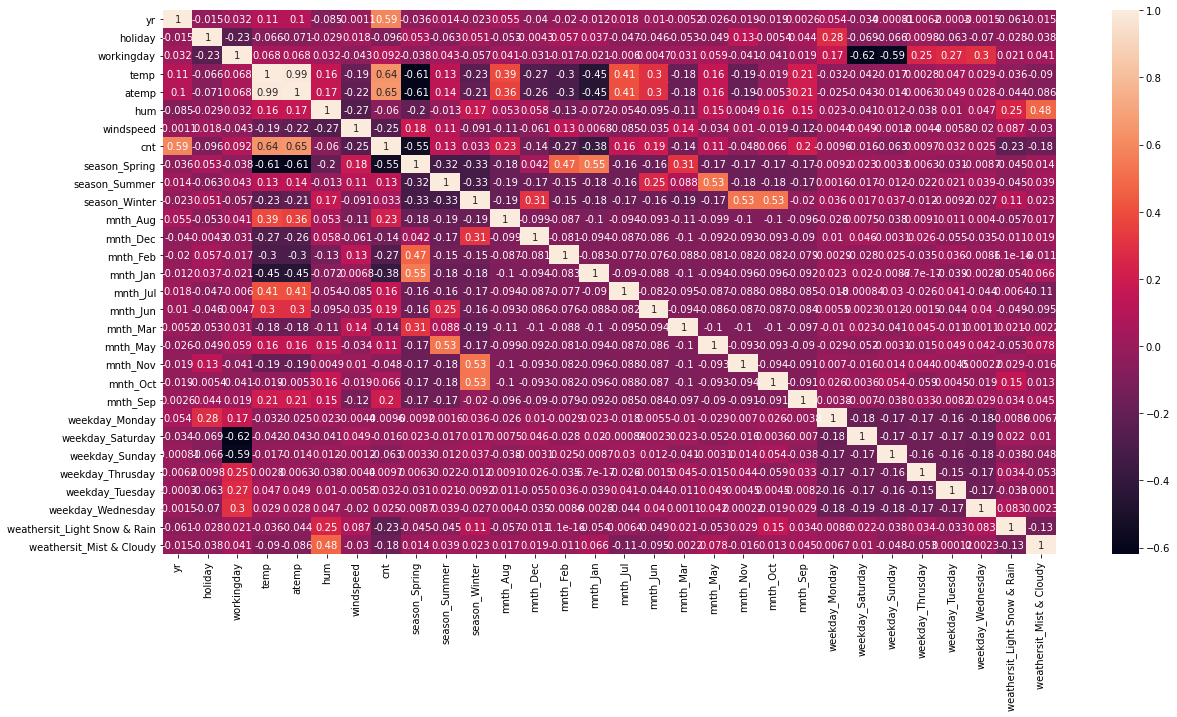

In [61]:
# correlation map to just visualize the correlations between features
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True)

In [62]:
#Splitting the target variable and rest other variables as y_train and X_train
y_train = df_train.pop('cnt')
X_train = df_train

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# Setting the initial features to be selected=15
lm = LinearRegression()
lm.fit(X_train, y_train)
#Applying RFE
rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 15),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [69]:
col = X_train.columns[rfe.support_]#initial 15 columns selected 
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]#columns discarded

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [121]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model-1

In [122]:
import statsmodels.api as sm  
#adding constant to the all the training features as stats model doesn't add intercept by default
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_rfe_sm)
lr_model=lr.fit()
lr_model.params

const                           0.251042
yr                              0.230502
holiday                        -0.058529
workingday                      0.043521
temp                            0.509836
hum                            -0.154716
windspeed                      -0.185956
season_Spring                  -0.050806
season_Summer                   0.049660
season_Winter                   0.094426
mnth_Jan                       -0.034326
mnth_Jul                       -0.053193
mnth_Sep                        0.081186
weekday_Saturday                0.053721
weathersit_Light Snow & Rain   -0.248777
weathersit_Mist & Cloudy       -0.057824
dtype: float64

In [123]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          2.31e-191
Time:                        02:03:50   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2510      0.036      6.949      0.000       0.180       0.322
yr                               0.2305      0.008     28.807      0.000       0.215       0.246
holiday                         -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                       0.0435      0.012      3.781      0.000       0.021       0.066
temp                             0.5098      0.034     14.851      0.000       0.442       0.577
hum                             -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                       -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_Spring                   -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_Summer                    0.0497      0.015      3.346      0.001       0.020       0.079
season_Winter                    0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                        -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                        -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                         0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Saturday                 0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist & Cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF is calculated to check the multicollinearity between columns

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.48
7,season_Summer,2.84
14,weathersit_Mist & Cloudy,2.29
0,yr,2.09
12,weekday_Saturday,1.98


### Model-2
- Dropping the 'hum' column and building again

In [125]:
X_train_new = X_train_rfe.drop('hum', axis=1)#Dropping 'hum' columns as it has VIF>5

In [126]:
X_train_new_rfe=sm.add_constant(X_train_new)
lr=sm.OLS(y_train,X_train_new_rfe)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          7.33e-189
Time:                        02:03:52   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1737      0.031      5.525      0.000       0.112       0.235
yr                               0.2344      0.008     29.019      0.000       0.218       0.250
holiday                         -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                       0.0465      0.012      3.983      0.000       0.024       0.069
temp                             0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                       -0.1563      0.025     -6.292      0.000      -0.205      -0.107
season_Spring                   -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_Summer                    0.0434      0.015      2.890      0.004       0.014       0.073
season_Winter                    0.0797      0.017      4.650      0.000       0.046       0.113
mnth_Jan                        -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_Jul                        -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_Sep                         0.0753      0.017      4.522      0.000       0.043       0.108
weekday_Saturday                 0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_Light Snow & Rain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_Mist & Cloudy        -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_Spring,3.08
6,season_Summer,2.33
0,yr,2.08
7,season_Winter,1.99
11,weekday_Saturday,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


### Model-3
- Dropping the 'temp' column and building again

In [128]:
X_train_new = X_train_new.drop('temp', axis=1)#Dropping 'temp' columns as it has VIF>5

In [129]:
X_train_new_rfe=sm.add_constant(X_train_new)
lr=sm.OLS(y_train,X_train_new_rfe)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          4.04e-154
Time:                        02:04:17   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5448      0.020     27.136      0.000       0.505       0.584
yr                               0.2478      0.009     26.156      0.000       0.229       0.266
holiday                         -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday                       0.0480      0.014      3.482      0.001       0.021       0.075
windspeed                       -0.1878      0.029     -6.429      0.000      -0.245      -0.130
season_Spring                   -0.2603      0.018    -14.490      0.000      -0.296      -0.225
season_Summer                   -0.0440      0.016     -2.729      0.007      -0.076      -0.012
season_Winter                   -0.0749      0.016     -4.829      0.000      -0.105      -0.044
mnth_Jan                        -0.1024      0.020     -5.104      0.000      -0.142      -0.063
mnth_Jul                        -0.0099      0.021     -0.461      0.645      -0.052       0.032
mnth_Sep                         0.0708      0.020      3.601      0.000       0.032       0.109
weekday_Saturday                 0.0564      0.017      3.252      0.001       0.022       0.090
weathersit_Light Snow & Rain    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
weathersit_Mist & Cloudy        -0.0896      0.010     -8.824      0.000      -0.110      -0.070
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model-4
- Dropping the 'holiday' column and building again

In [130]:
X_train_new = X_train_new.drop('holiday', axis=1)#Dropping 'holiday' column as it has p-value >0.05

In [131]:
X_train_new_rfe=sm.add_constant(X_train_new)
lr=sm.OLS(y_train,X_train_new_rfe)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          1.54e-154
Time:                        02:05:20   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5368      0.020     27.383      0.000       0.498       0.575
yr                               0.2480      0.009     26.123      0.000       0.229       0.267
workingday                       0.0565      0.013      4.359      0.000       0.031       0.082
windspeed                       -0.1888      0.029     -6.450      0.000      -0.246      -0.131
season_Spring                   -0.2612      0.018    -14.516      0.000      -0.297      -0.226
season_Summer                   -0.0437      0.016     -2.703      0.007      -0.075      -0.012
season_Winter                   -0.0758      0.016     -4.881      0.000      -0.106      -0.045
mnth_Jan                        -0.1030      0.020     -5.124      0.000      -0.143      -0.064
mnth_Jul                        -0.0088      0.021     -0.409      0.683      -0.051       0.033
mnth_Sep                         0.0689      0.020      3.500      0.001       0.030       0.108
weekday_Saturday                 0.0650      0.017      3.893      0.000       0.032       0.098
weathersit_Light Snow & Rain    -0.3033      0.029    -10.573      0.000      -0.360      -0.247
weathersit_Mist & Cloudy        -0.0891      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.393   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.472
Skew:                          -0.455   Prob(JB):                     3.36e-18
Kurtosis:                       4.720   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
3,season_Spring,2.92
4,season_Summer,2.25
5,season_Winter,1.92
0,yr,1.91
9,weekday_Saturday,1.62
6,mnth_Jan,1.60
11,weathersit_Mist & Cloudy,1.56
7,mnth_Jul,1.29


### Model-5 (Final model)
- Dropping the 'mnth_Jul' column and building again

In [133]:
X_train_new = X_train_new.drop('mnth_Jul', axis=1)#Dropping 'mnth_Jul' column as it has p-value >0.05

In [134]:
X_train_new_rfe=sm.add_constant(X_train_new)
lr=sm.OLS(y_train,X_train_new_rfe)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          1.30e-155
Time:                        02:07:19   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5334      0.018     30.033      0.000       0.499       0.568
yr                               0.2480      0.009     26.149      0.000       0.229       0.267
workingday                       0.0567      0.013      4.377      0.000       0.031       0.082
windspeed                       -0.1887      0.029     -6.453      0.000      -0.246      -0.131
season_Spring                   -0.2581      0.016    -15.860      0.000      -0.290      -0.226
season_Summer                   -0.0406      0.014     -2.847      0.005      -0.069      -0.013
season_Winter                   -0.0729      0.014     -5.303      0.000      -0.100      -0.046
mnth_Jan                        -0.1031      0.020     -5.130      0.000      -0.143      -0.064
mnth_Sep                         0.0714      0.019      3.810      0.000       0.035       0.108
weekday_Saturday                 0.0650      0.017      3.900      0.000       0.032       0.098
weathersit_Light Snow & Rain    -0.3034      0.029    -10.586      0.000      -0.360      -0.247
weathersit_Mist & Cloudy        -0.0888      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_Spring,2.65
4,season_Summer,1.99
0,yr,1.88
5,season_Winter,1.73
6,mnth_Jan,1.60
8,weekday_Saturday,1.56
10,weathersit_Mist & Cloudy,1.56
7,mnth_Sep,1.18


### Residual Analysis

Text(0.5, 0, 'Errors')

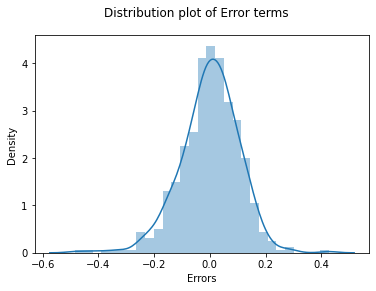

In [142]:
#checking distribution of error terms
y_train_pred_cnt=lr_model.predict(X_train_new_rfe)
res=y_train-y_train_pred_cnt
sns.distplot(res)
plt.suptitle('Distribution plot of Error terms')
plt.xlabel('Errors')

Text(0.5, 0.98, 'Qq plot')

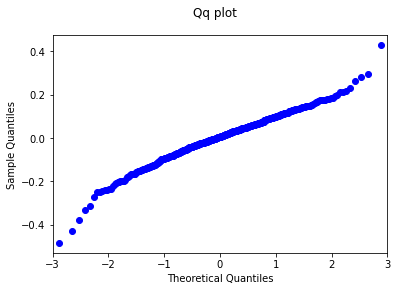

In [193]:
sm.qqplot(res)
plt.suptitle('Qq plot')

### Prediction using Final model

In [143]:
#we follow the same steps for scaling the numerical values of test data also to transform the data so 
#as to get accurate predictions

num_vars = ['cnt','hum','windspeed','temp','atemp']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [144]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [145]:
#remove target variable to test the model on the remaining variables to predict the target variable then
y_test = df_test.pop('cnt')
X_test = df_test

In [147]:
#Selecting only the model used final variables while prediction also
X_test=X_test[X_train_new.columns]
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,1.0,0,0,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,1,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,1,0,0,0,0,0,0


In [148]:
y_test_pred=lr_model.predict(X_test_sm)

In [183]:
from sklearn.metrics import r2_score
r2score=r2_score(y_true=y_test,y_pred=y_test_pred)
print("R2 Score: ",r2score)

R2 Score:  0.7409269375982522


Text(0, 0.5, 'y_test_pred')

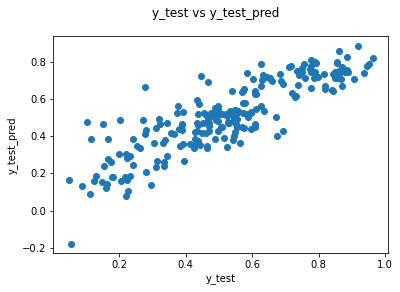

In [152]:
# plot y_test vs y_test_pred
plt.scatter(y_test, y_test_pred)
plt.suptitle('y_test vs y_test_pred') 
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [159]:
variables = pd.DataFrame(lr_model.params)
variables.insert(0,'Variables',variables.index)
variables.rename(columns = {0:'Coefficient value'},inplace = True)
variables.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
variables

,Variables,Coefficient value
const,const,0.533414
yr,yr,0.247992
mnth_Sep,mnth_Sep,0.071353
weekday_Saturday,weekday_Saturday,0.065027
workingday,workingday,0.056660
season_Summer,season_Summer,-0.040579
season_Winter,season_Winter,-0.072862
weathersit_Mist & Cloudy,weathersit_Mist & Cloudy,-0.088820
mnth_Jan,mnth_Jan,-0.103085
windspeed,windspeed,-0.188736


cnt = 0.533414 + (0.247992 X yr)+(0.071353 X mnth_Sep)+(0.065027 X weekday_Saturday)+(0.056660 X workingday)
-(0.040579 X season_Summer)-(0.072862 X season_Winter) -(0.08882 X weathersit_Mist & Cloudy)-(0.103085 X mnth_Jan)
-(0.188736 X windspeed)-(0.258069 X season_Spring)-(0.303393 X weathersit_Light Snow & Rain)

#### From the above,we can observe that,
- variables with +ve coefficients like yr,mnth_Sep,weekday_Saturday, workingday indicate that increase in these values,
  leads to increase in cnt
- other remaining variables with -ve coefficient decrease in these values leads to increase in cnt
- yr is the most significant varible with highest coefficient and year 2019 had higher cnt than 2018
- mnth september has the highest cnt and mnth january on the other hand has the least
- cnt is more during workdays,which we can assume that it is less during holidays
- In Spring season cnt is very less
### So we can conclude that the year ,month and season affect the bike booking cnt.